# Master Fig 6

In [1]:
library(ggplot2)
library(patchwork)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14")

## Load Subfigs

In [9]:
rna_count_barplots = readRDS("./subfigs/20201221_rna_bar_plots.rds")
# rna_sim = readRDS("./subfigs/20201221_rna_sim.rds")
# atac_sim = readRDS("./subfigs/20201221_atac_sim.rds")
# peak_set_het_vortex = readRDS("./subfigs/20201221_vortex.rds")

## Assemble Components

In [4]:
horizontal_spacers <- function(plot, widths=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), widths=widths)
}

vertical_spacers <- function(plot, heights=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), ncol=1, heights=heights)
}

placeholder_plot <- function(text, size=1) {
    df = data.frame(x=c(0), y=c(0), t=c(text))
    ggplot(df)+
    geom_text(aes(x=x,y=y,label=t), size=size)+
    theme_void()+
    theme(panel.border = element_rect(colour = "black", fill=NA, size=0.5),
                                                       plot.margin = unit(c(0,0,0,0), "pt"))
}

### Schematic + Peak Set x Motif

In [11]:
row1 = wrap_plots(placeholder_plot("Heterokaryon Cartoon +\nSchematic", size=10),
                 rna_count_barplots,
                 widths = c(7, 20))

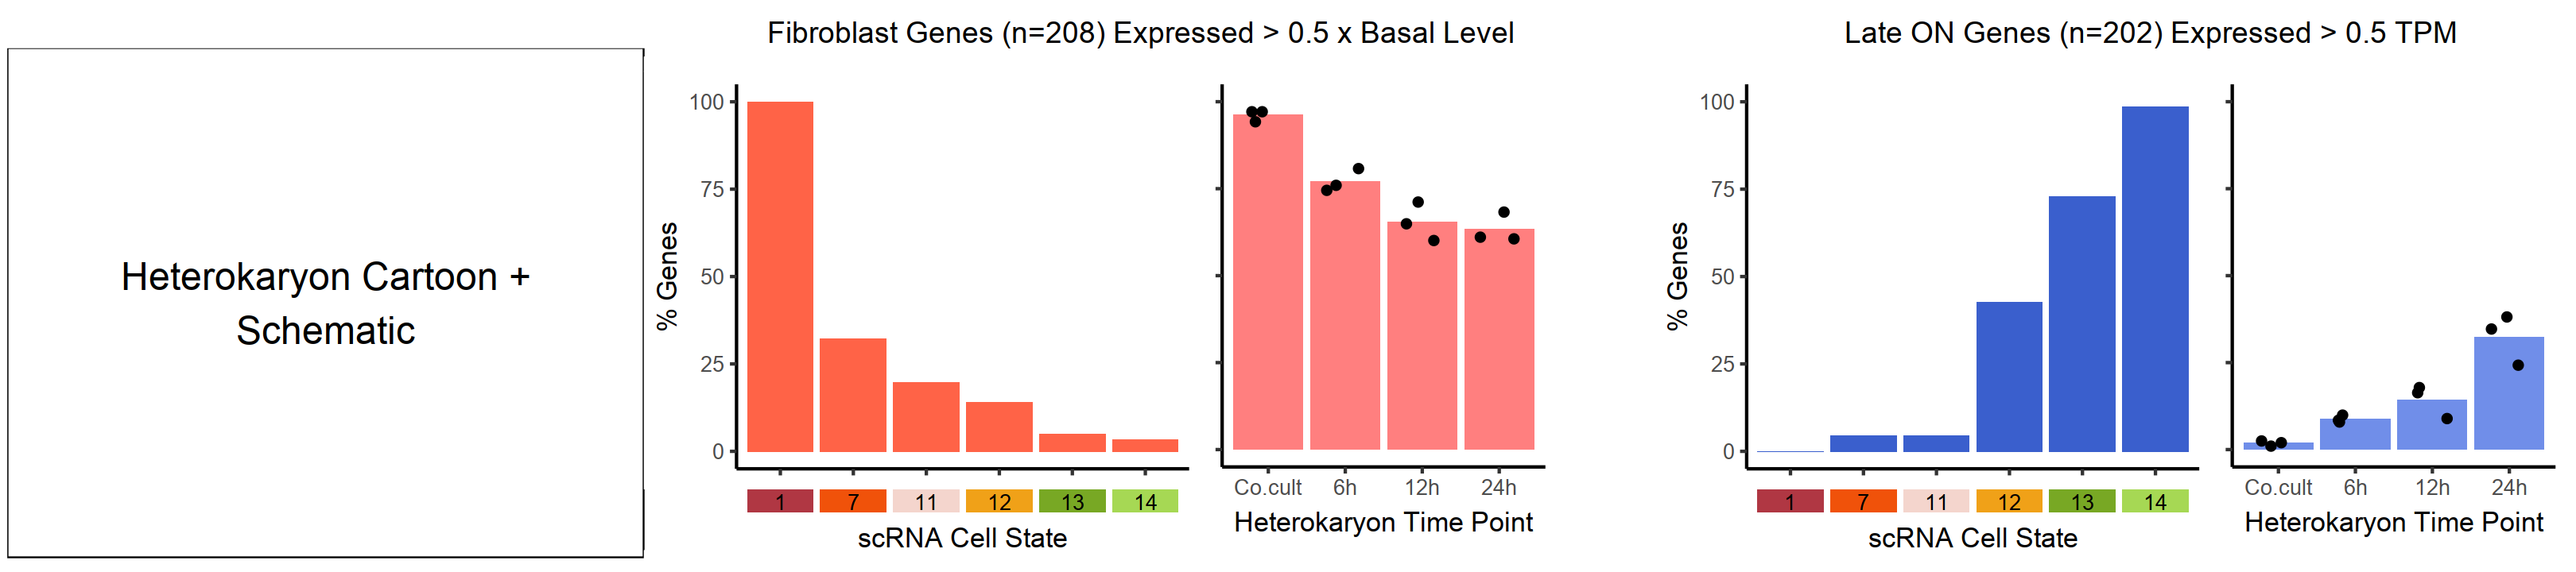

In [12]:
options(repr.plot.width = 27, repr.plot.height = 6)
row1

### Similarity Plots

In [21]:
row2 = wrap_plots(rna_sim,
                 atac_sim,
                 widths=c(15,12))

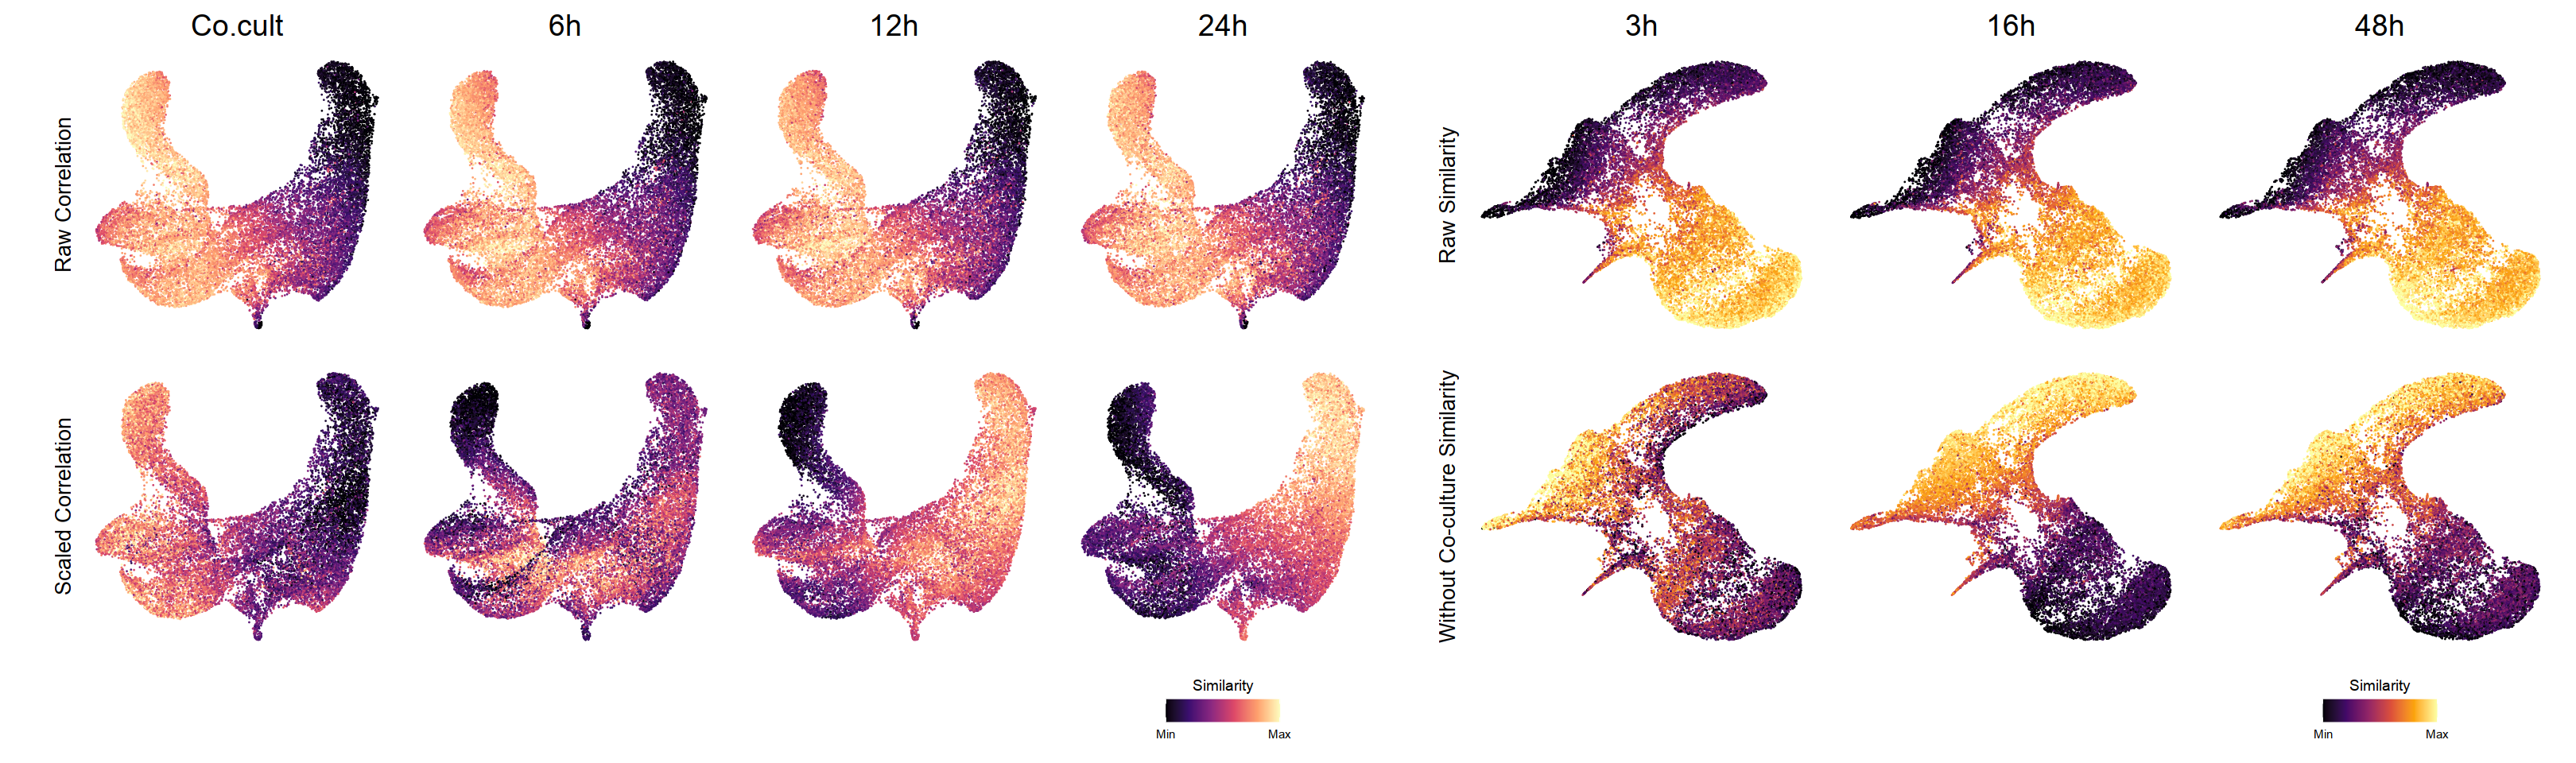

In [22]:
options(repr.plot.width = 27, repr.plot.height = 8)
row2

### Vortex + Vignette

In [25]:
row3 = wrap_plots(vertical_spacers(peak_set_het_vortex),
                 plot_spacer(),
                 placeholder_plot("Vignette of Late Opening Sites", size=10),
                 widths=c(8,2,17))

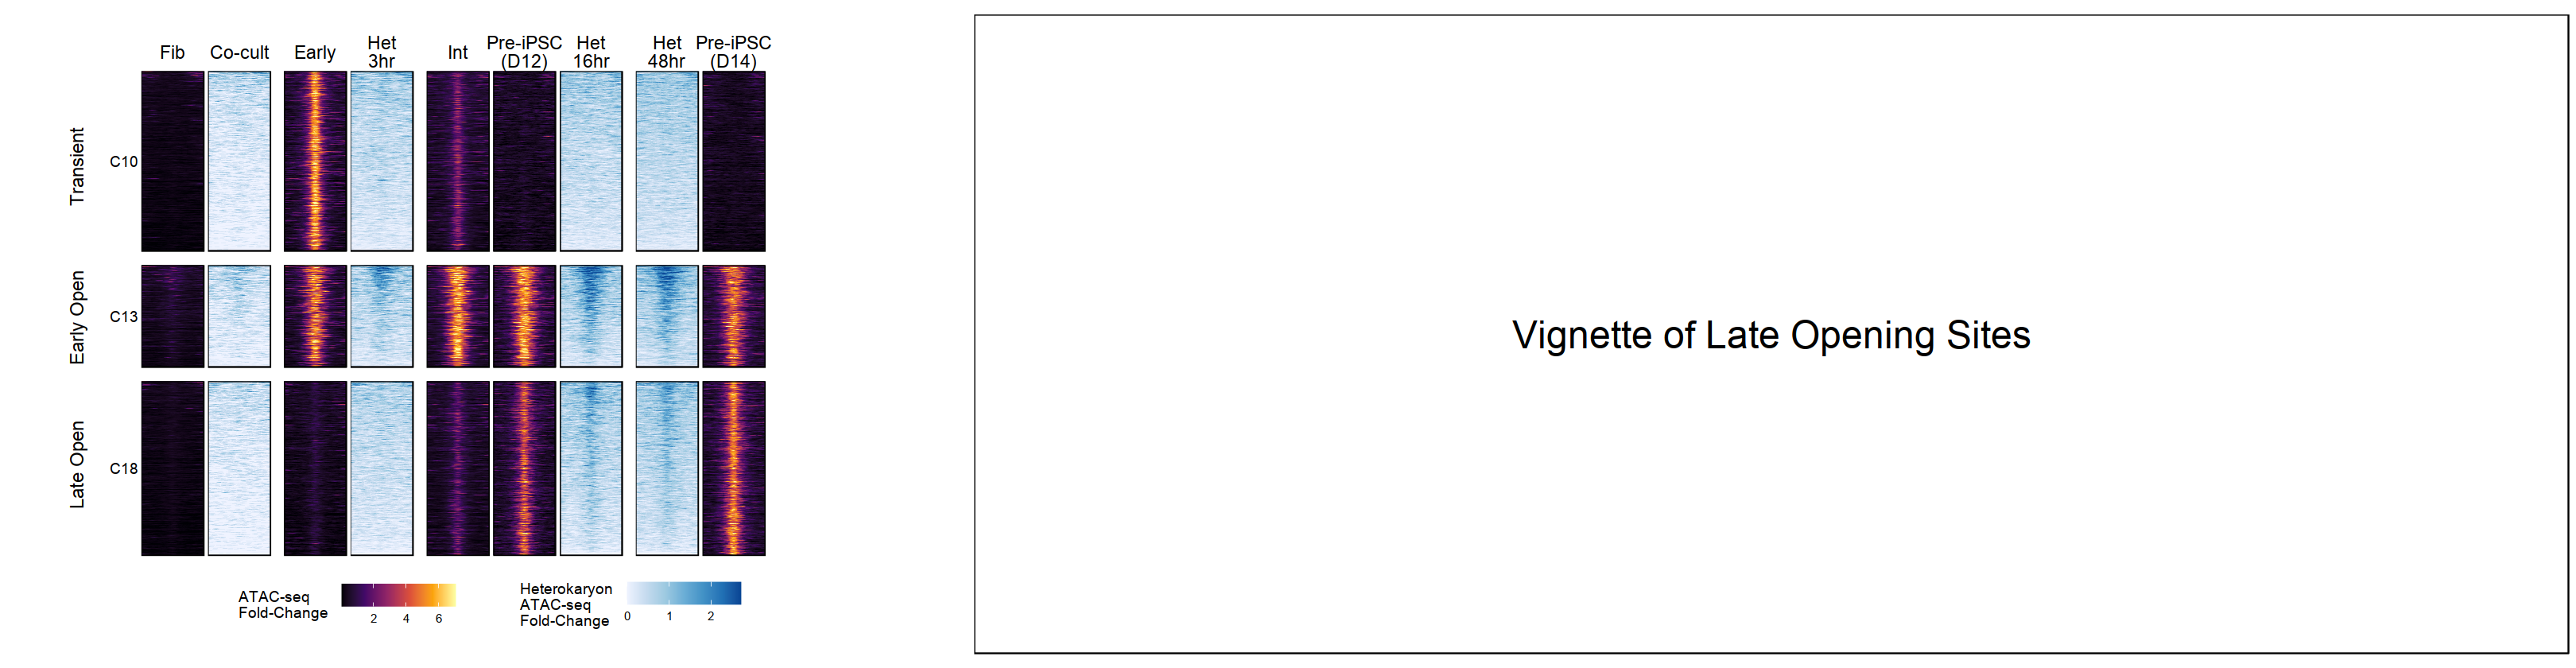

In [26]:
options(repr.plot.width = 27, repr.plot.height = 7)
row3

## Assemble Master

In [27]:
main_fig = wrap_plots(row1,
                      row2,
                      row3,
                      heights = c(6,8,7))

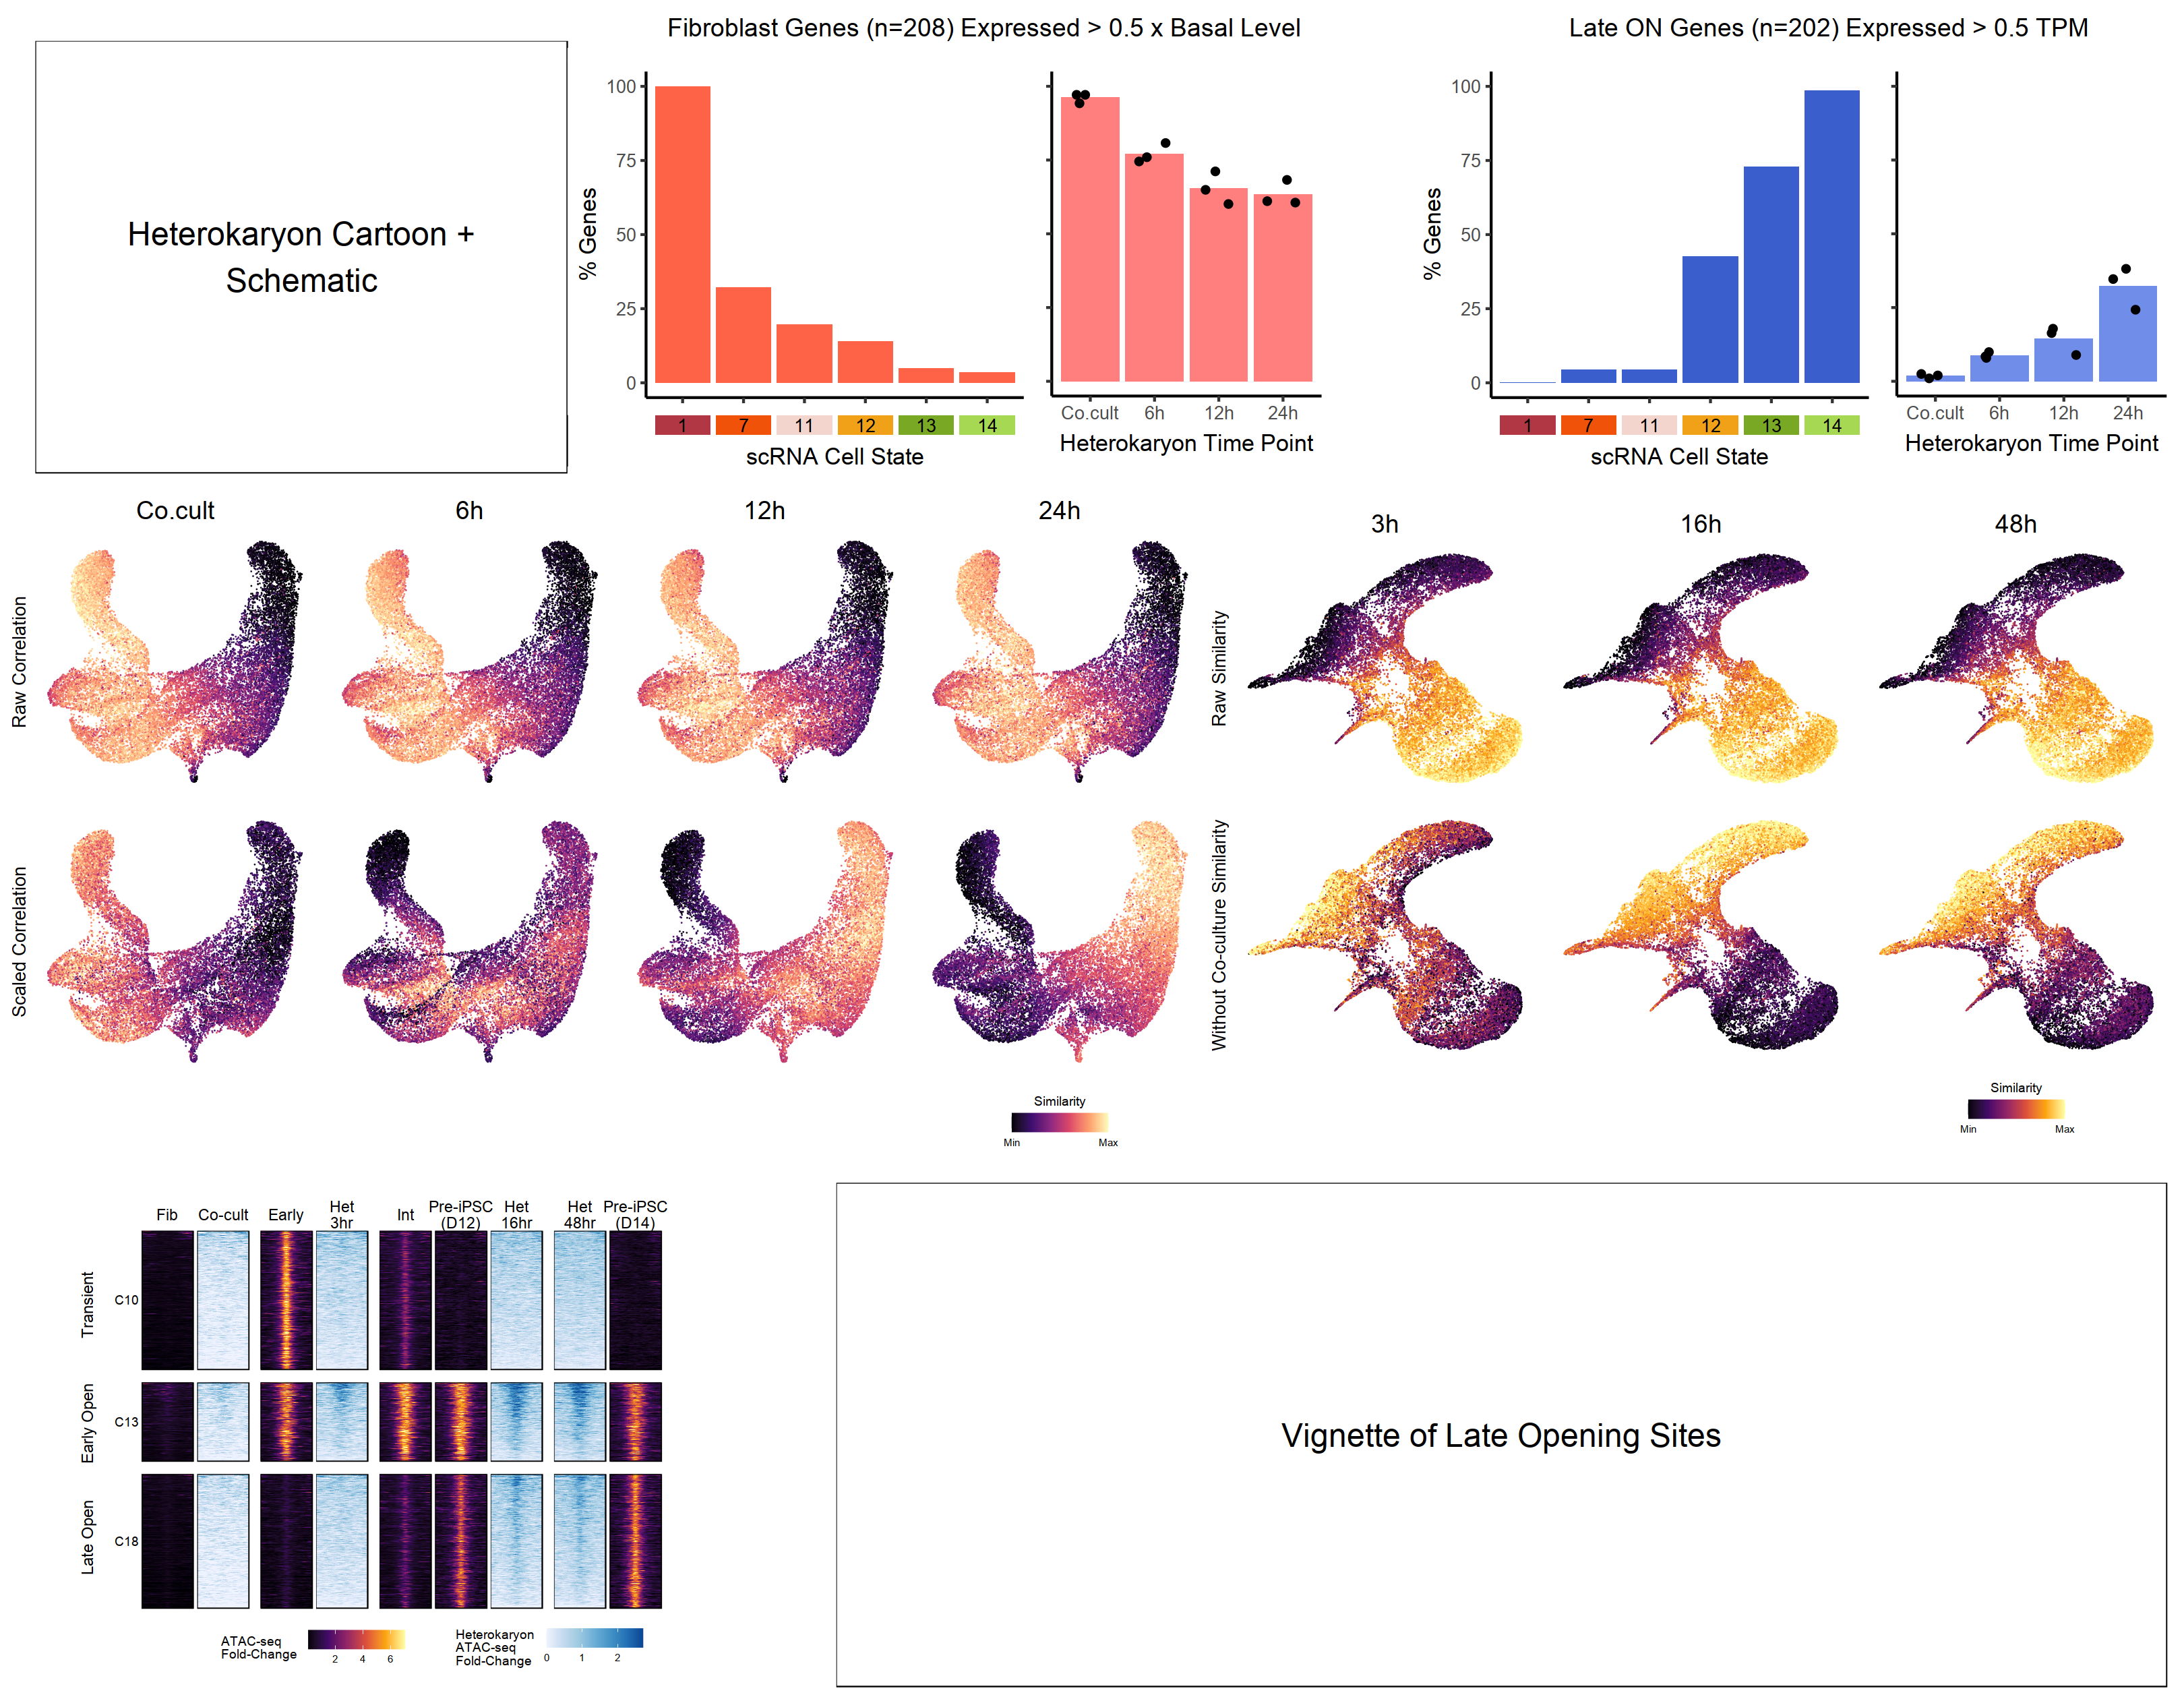

In [28]:
options(repr.plot.width = 27, repr.plot.height = 21)
main_fig

In [164]:
ggsave("tmp.pdf", main_fig, height=27, width=21)